In [ ]:
!pip install webdriver_manager

In [ ]:
!rm -rf /Users/briandekeijzer/.wdm
!pip install --upgrade webdriver_manager

In [ ]:
!pip install selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.7/467.7 kB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.7 MB/s eta 0:00:00


In [ ]:
!apt --fix-broken install

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


카페 맘스홀릭

-> 카테고리 "임신&산후 우울증"

-> 제목에 "산후우울증" 단어를 포함

->댓글이 2개 이상인 글

-> 제목, 내용, 댓글1, 댓글2 컬럼으로 데이터프레임 생성

크롤링 크롬드라이버 자동설치 관련 오류 해결


https://nicedeveloper.tistory.com/entry/%ED%81%AC%EB%A1%AC%EB%93%9C%EB%9D%BC%EC%9D%B4%EB%B2%84-%EC%97%90%EB%9F%AC-service-option-browser-driver

In [ ]:
import time
import csv
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options

from bs4 import BeautifulSoup
import pandas as pd
import os

# 설정
chrome_options = Options()
chrome_options.add_argument('--headless')  # 브라우저를 띄우지 않고 실행
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--single-process')
chrome_options.add_argument('--disable-dev-shm-usage')

# ChromeDriver 자동 설치 및 설정
#service = Service(ChromeDriverManager().install())

# Chrome WebDriver 시작
driver = webdriver.Chrome(options=chrome_options)

# 네이버 로그인
driver.get('https://nid.naver.com/nidlogin.login')
id_ = 'aim1016'
pw = 'tjdnf6329!'

# Naver login 네이버 로그인
driver.execute_script("document.getElementsByName('id')[0].value=\'"+ id_ + "\'")
driver.execute_script("document.getElementsByName('pw')[0].value=\'"+ pw + "\'")
driver.find_element(by=By.XPATH,value='//*[@id="log.login"]').click()
time.sleep(1)

# wanted naver cafe url, 수집할 페이지 및 게시글 수 설정
baseurl = 'https://cafe.naver.com/imsanbu/'
clubid = 10094499
menuid = 425
userDisplay = 50

pageNum = 1

title_df = []
url_df = []
data = []

for pageNum in range(1,50):
  url = baseurl + 'ArticleList.nhn?search.clubid=' + str(clubid) + '&search.menuid=' + str(menuid) +'&search.page='+ str(pageNum) +'&userDisplay=' + str(userDisplay)

  # 카페 내 게시글 목록 페이지 접속
  driver.get(url)
# driver.switch_to.frame('cafe_main')

  # BeautifulSoup을 사용하여 페이지 소스 파싱
  frame = driver.find_element(By.ID, 'cafe_main')
  driver.switch_to.frame(frame)
  soup = BeautifulSoup(driver.page_source, 'html.parser')
  articles = soup.find_all('a', class_='article')

  for article in articles:
      title = article.text.strip()
      if '[산후우울증' not in title:
          continue
      title = title.replace("[산후우울증 후기]\n", "")
      title = title.replace("[산후우울증 문의]\n", "")
      title = title.replace("[산후우울증 정보]\n", "")
      title_df.append(title)

      article_url = 'https://cafe.naver.com' + article['href']
      url_df.append(article_url)
    # 글 내용 크롤링
   # driver.get(article_url)
   # article_soup = BeautifulSoup(driver.page_source, 'html.parser')
   # content = article_soup.find('div', class_='content CafeViewer').text.strip() if article_soup.find('div', class_='content CafeViewer') else "내용없음"

df= pd.DataFrame({'title':title_df, 'url':url_df})

In [ ]:
df

,title,url
0,\n ...,https://cafe.naver.com/ArticleRead.nhn?clubid=...
1,\n ...,https://cafe.naver.com/ArticleRead.nhn?clubid=...
2,\n ...,https://cafe.naver.com/ArticleRead.nhn?clubid=...
3,\n ...,https://cafe.naver.com/ArticleRead.nhn?clubid=...
4,\n ...,https://cafe.naver.com/ArticleRead.nhn?clubid=...
...,...,...
738,\n ...,https://cafe.naver.com/ArticleRead.nhn?clubid=...
739,\n ...,https://cafe.naver.com/ArticleRead.nhn?clubid=...
740,\n ...,https://cafe.naver.com/ArticleRead.nhn?clubid=...
741,\n ...,https://cafe.naver.com/ArticleRead.nhn?clubid=...


In [ ]:
df

,title,url
0,\n ...,https://cafe.naver.com/ArticleRead.nhn?clubid=...
1,\n ...,https://cafe.naver.com/ArticleRead.nhn?clubid=...
2,\n ...,https://cafe.naver.com/ArticleRead.nhn?clubid=...
3,\n ...,https://cafe.naver.com/ArticleRead.nhn?clubid=...
4,\n ...,https://cafe.naver.com/ArticleRead.nhn?clubid=...
...,...,...
302,\n ...,https://cafe.naver.com/ArticleRead.nhn?clubid=...
303,\n ...,https://cafe.naver.com/ArticleRead.nhn?clubid=...
304,\n ...,https://cafe.naver.com/ArticleRead.nhn?clubid=...
305,\n ...,https://cafe.naver.com/ArticleRead.nhn?clubid=...


In [ ]:
import time
import pyperclip
from tqdm import trange
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
from bs4 import BeautifulSoup as bs

# 브라우저 설정
chrome_options = Options()
chrome_options.add_argument('--headless')  # 브라우저를 띄우지 않고 실행
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--single-process')
chrome_options.add_argument('--disable-dev-shm-usage')

# Chrome WebDriver 시작
driver = webdriver.Chrome(options=chrome_options)

# 네이버 카페 로그인
def input_text(xpath, text):
    element = driver.find_element(By.XPATH, xpath)
    element.clear()
    element.send_keys(text)
    time.sleep(1)

id = 'aim1016'
pw = 'tjdnf6329!'

driver.get('https://nid.naver.com/nidlogin.login?mode=form&url=https%3A%2F%2Fwww.naver.com')
driver.implicitly_wait(3)

input_text('//*[@id="id"]', id)
input_text('//*[@id="pw"]', pw)
driver.find_element(By.XPATH, '//*[@id="log.login"]').click()

time.sleep(2)  # 로그인 처리 시간을 위해 잠시 대기

In [ ]:
# 수집할 페이지 및 게시글 수 설정
baseurl = 'https://cafe.naver.com/imsanbu/'
clubid = 10094499
menuid = 425
userDisplay = 50
pageNum = 1

#url = baseurl + 'ArticleList.nhn?search.clubid=' + str(clubid) + '&search.menuid=' + str(menuid) + '&search.page=' + str(pageNum) + '&userDisplay=' + str(userDisplay)

titles = []
url = []
contents = []
comments1 = []
comments2 = []

In [ ]:
# 페이지 순회
for pageNum in trange(1, 4):  # 원하는 페이지 범위 설정
    url = baseurl + f'ArticleList.nhn?search.clubid={clubid}&search.menuid={menuid}&search.page={pageNum}&userDisplay={userDisplay}'
    driver.get(url)
    time.sleep(2)

    frame = driver.find_element(By.ID, 'cafe_main')
    driver.switch_to.frame(frame) # 크롬 드라이버 모드 아이프레임으로 전환
    soup = bs(driver.page_source, 'html.parser')
    articles = soup.find_all('a', class_='article')

    for article in articles:
        title = article.text.strip()
        if '산후우울증' not in title:
            continue

        titles.append(title)
        article_url = 'https://cafe.naver.com' + article['href']
        url.append(article_url)

        driver.get(article_url)
        time.sleep(2)

        try:
            driver.switch_to.frame('cafe_main')
            article_soup = bs(driver.page_source, 'html.parser')

            # 글 내용 수집
            # content_div = article_soup.find('div', {'class': 'content CafeViewer'})
            content_div = article_soup.find('div', class_='se-main-container')
            if content_div:
                paragraphs = content_div.find_all('p')
                content = "\n".join([p.text.strip() for p in paragraphs])
            else:
                content = "내용 없음"

            # 댓글 수집
            comments = article_soup.find_all('span', class_='comm_body')
            comment1 = comments[0].text.strip() if len(comments) > 0 else ""
            comment2 = comments[1].text.strip() if len(comments) > 1 else ""



            contents.append(content)
            comments1.append(comment1)
            comments2.append(comment2)

        except Exception as e:
            print(f"오류 발생: {e}")
            continue

        driver.switch_to.default_content()
        driver.get(url)
        time.sleep(2)
        frame = driver.find_element(By.ID, 'cafe_main')
        driver.switch_to.frame(frame)

# 데이터프레임 생성
df = pd.DataFrame({
    '제목': titles,
    'url' : url,
    '내용': contents,
    '댓글1': comments1,
    '댓글2': comments2
})
df

  0%|          | 0/3 [00:00<?, ?it/s]

오류 발생: 'str' object has no attribute 'append'
오류 발생: 'str' object has no attribute 'append'
오류 발생: 'str' object has no attribute 'append'
오류 발생: 'str' object has no attribute 'append'
오류 발생: 'str' object has no attribute 'append'
오류 발생: 'str' object has no attribute 'append'
오류 발생: 'str' object has no attribute 'append'
오류 발생: 'str' object has no attribute 'append'
오류 발생: 'str' object has no attribute 'append'
오류 발생: 'str' object has no attribute 'append'
오류 발생: 'str' object has no attribute 'append'
오류 발생: 'str' object has no attribute 'append'
오류 발생: 'str' object has no attribute 'append'
오류 발생: 'str' object has no attribute 'append'
오류 발생: 'str' object has no attribute 'append'
오류 발생: 'str' object has no attribute 'append'
오류 발생: 'str' object has no attribute 'append'
오류 발생: 'str' object has no attribute 'append'
오류 발생: 'str' object has no attribute 'append'
오류 발생: 'str' object has no attribute 'append'
오류 발생: 'str' object has no attribute 'append'
오류 발생: 'str' object has no attribu

 33%|███▎      | 1/3 [01:14<02:28, 74.24s/it]

오류 발생: 'str' object has no attribute 'append'
오류 발생: 'str' object has no attribute 'append'
오류 발생: 'str' object has no attribute 'append'
오류 발생: 'str' object has no attribute 'append'
오류 발생: 'str' object has no attribute 'append'
오류 발생: 'str' object has no attribute 'append'
오류 발생: 'str' object has no attribute 'append'
오류 발생: 'str' object has no attribute 'append'
오류 발생: 'str' object has no attribute 'append'
오류 발생: 'str' object has no attribute 'append'
오류 발생: 'str' object has no attribute 'append'
오류 발생: 'str' object has no attribute 'append'
오류 발생: 'str' object has no attribute 'append'
오류 발생: 'str' object has no attribute 'append'
오류 발생: 'str' object has no attribute 'append'
오류 발생: 'str' object has no attribute 'append'
오류 발생: 'str' object has no attribute 'append'
오류 발생: 'str' object has no attribute 'append'
오류 발생: 'str' object has no attribute 'append'
오류 발생: 'str' object has no attribute 'append'


 67%|██████▋   | 2/3 [02:13<01:05, 65.23s/it]

오류 발생: 'str' object has no attribute 'append'
오류 발생: 'str' object has no attribute 'append'
오류 발생: 'str' object has no attribute 'append'
오류 발생: 'str' object has no attribute 'append'
오류 발생: 'str' object has no attribute 'append'
오류 발생: 'str' object has no attribute 'append'
오류 발생: 'str' object has no attribute 'append'
오류 발생: 'str' object has no attribute 'append'
오류 발생: 'str' object has no attribute 'append'
오류 발생: 'str' object has no attribute 'append'
오류 발생: 'str' object has no attribute 'append'
오류 발생: 'str' object has no attribute 'append'
오류 발생: 'str' object has no attribute 'append'
오류 발생: 'str' object has no attribute 'append'
오류 발생: 'str' object has no attribute 'append'
오류 발생: 'str' object has no attribute 'append'
오류 발생: 'str' object has no attribute 'append'


100%|██████████| 3/3 [03:02<00:00, 60.89s/it]

오류 발생: 'str' object has no attribute 'append'


ValueError: All arrays must be of the same length

In [ ]:
titles = []
url = []
contents = []
comments1 = []
comments2 = []

In [ ]:
url = baseurl + f'ArticleList.nhn?search.clubid={clubid}&search.menuid={menuid}&search.page={pageNum}&userDisplay={userDisplay}'
driver.get(url)
time.sleep(2)

frame = driver.find_element(By.ID, 'cafe_main')
driver.switch_to.frame(frame)
soup = bs(driver.page_source, 'html.parser')
articles = soup.find_all('a', class_='article')

In [ ]:
for article in articles:
  title = article.text.strip()
  if '산후우울증' not in title:
    continue

  titles.append(title)
  article_url = 'https://cafe.naver.com' + article['href']
  url.append(article_url)
  driver.get(article_url)
  time.sleep(2)

In [ ]:
titles[3]

'[산후우울증 후기]\n                                \n                                \n\n                                \n                                \n                                    \n                                    거울보면 우울하고 애기울면 더 우울해요'

In [ ]:
url[3]

'https://cafe.naver.com/ArticleRead.nhn?clubid=10094499&page=3&userDisplay=50&menuid=425&boardtype=L&articleid=70990652&referrerAllArticles=false'

In [ ]:
driver.get(url[3])

In [ ]:
driver.get(url[3])
#driver.switch_to.frame('cafe_main')
time.sleep(60)
article_soup = bs(driver.page_source, 'html.parser')

<html lang="ko"><head>
<meta content="noindex, nofollow" name="robots"/>
<meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
<meta content="requiresActiveX=true" http-equiv="X-UA-Compatible"/>
<title> 맘스홀릭 베이비 (330만 엄마들의 임신, 육아 지식in 카페) : 네이버 카페</title>
<link href="/favicon.ico?2" rel="shortcut icon" type="image/x-icon"/>
<meta content="always" name="referrer"/>
<link href="/static/css/main/css/line_sticker-1644284985000-9453.css" rel="stylesheet" type="text/css"/>
<link href="/static/css/main/css/comment-1644284985000-17199.css" rel="stylesheet" type="text/css"/>
<link href="/static/css/main/css/map/cafe_map-1644284985000-14563.css" rel="stylesheet" type="text/css"/>
<style id="cafeCss" type="text/css">
</style>
<link href="/static/css/main/css/wide/1080_cafe-1713778124000-230073.css" rel="stylesheet" type="text/css"/>
<link href="/static/css/main/css/wide/1080_skin_white-1644284985000-20365.css" rel="stylesheet" type="text/css"/>
<script>
var g_sUserId = "";
var g_sUs
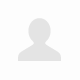
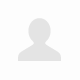

In [ ]:
article_soup

In [ ]:
content_div = article_soup.find('div', class_='se-main-container')
content_div

In [ ]:
driver.get(article_url)

In [ ]:
driver.switch_to.frame('cafe_main')

In [ ]:
article_soup = bs(driver.page_source, 'html.parser')

In [ ]:
article_soup

<html lang="ko" theme="white"><head><link href="https://editor-static.pstatic.net/v/basic/1.55.1/css/se.viewer.desktop.css" rel="stylesheet"/><script async="" src="https://ntm.pstatic.net/ex/nlog.js"></script><script async="" src="https://ntm.pstatic.net/ex/nil-1.2.4.js"></script><script async="" src="https://ssl.pstatic.net/tveta/libs/glad/prod/gfp-core.js" type="text/javascript"></script><meta charset="utf-8"/><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="noindex, nofollow" name="robots"/><meta content="width=device-width,initial-scale=1" name="viewport"/><link href="https://ca-fe.pstatic.net/web-section/favicon.ico" rel="icon"/><title>네이버 카페</title><link href="https://ca-fe.pstatic.net/web-section/css/chunk-vendors.260be622.css" rel="stylesheet"/><link href="https://ca-fe.pstatic.net/web-section/css/app.6aff957e.css" rel="stylesheet"/><script async="" charset="utf-8" src="https://ssl.pstatic.n

In [ ]:
content_div = article_soup.find('div', {'class': 'content CafeViewer'})

In [ ]:
driver.get(article_url)
        time.sleep(2)

        try:
            driver.switch_to.frame('cafe_main')
            article_soup = bs(driver.page_source, 'html.parser')

            # 글 내용 수집
            # content_div = article_soup.find('div', {'class': 'content CafeViewer'})
            content_div = article_soup.find('div', class_='se-main-container')
            if content_div:
                paragraphs = content_div.find_all('p')
                content = "\n".join([p.text.strip() for p in paragraphs])
            else:
                content = "내용 없음"

내용 수집이 안돼

=> 가장 기본

https://github.com/jungfrau70/docker-elk-oss/blob/35e6339710128d41d7d30632a387d8c4a300582d/shared/notebooks/3_web-scraping-II/.ipynb_checkpoints/4_%EB%84%A4%EC%9D%B4%EB%B2%84%EC%B9%B4%ED%8E%98-checkpoint.ipynb#L1591

=> https://github.com/holinessnine/Project_Mirae/blob/d4b90905c5de8f1e12708adb572d7720cae04c62/Codes/%EB%84%A4%EC%9D%B4%EB%B2%84%EC%B9%B4%ED%8E%98%20%ED%81%AC%EB%A1%A4%EB%A7%81.ipynb

=> https://velog.io/@mino0121/Python-Selenium%EC%9D%84-%EC%9D%B4%EC%9A%A9%ED%95%9C-Naver-cafe-%EA%B2%8C%EC%8B%9C%EB%AC%BC-%ED%85%8D%EC%8A%A4%ED%8A%B8-%EC%8A%A4%ED%81%AC%EB%9E%98%ED%95%91-2

## chrome 드라이버 직접 다운
https://googlechromelabs.github.io/chrome-for-testing/

내 노트북은 아래 링크 들어가

https://storage.googleapis.com/chrome-for-testing-public/125.0.6422.141/mac-x64/chromedriver-mac-x64.zip

In [ ]:
import os
import subprocess

In [ ]:
subprocess.run(['chmod', '+x', driverLoc])

CompletedProcess(args=['chmod', '+x', '/content/chromedriver'], returncode=0)

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service

driverLoc = '/content/chromedriver'
service = Service(driverLoc)
options = webdriver.ChromeOptions()

driver = webdriver.Chrome(service=service, options=options)

# 네이버 로그인 페이지 접속
driver.get('https://nid.naver.com/nidlogin.login')

OSError: [Errno 8] Exec format error: '/content/chromedriver'